In [30]:
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [33]:
sinwave = 2.5 + np.sin(np.arange(0, 10000, 0.45))

# 2 Genauigkeit AD
## Messfehler

In [34]:
zeit, voltage = np.genfromtxt(os.getcwd() + "/Messdaten/DA-SinusSchwingung.csv", delimiter=";", skip_header=3, usecols=(0,1)).T


# 3 Genauigkeit der DA-Wandlung

In [35]:
powersupply,keithley,voltcraft,pico,wandler = np.genfromtxt(os.getcwd() + "/Messdaten/DA-Wandlung.csv", delimiter=";", skip_header=1, usecols=(0,1,2,3,4)).T
messfehler = []
for i, v in enumerate(keithley):
    messfehler.append(pico[i] - v)
print("Messfehler: ",messfehler)

anz = len(messfehler)

Messfehler:  [0.01200000000000001, 0.017000000000000126, 0.014999999999999902, 0.03200000000000003, 0.03799999999999981, 0.040000000000000036, 0.043999999999999595, 0.04600000000000026, 0.057000000000000384]


### Standartabweichung

In [36]:
s = 0
for i, v in enumerate(messfehler):
    s = s + math.pow(v,2)
s = math.sqrt( (1/(anz-1) * s))
print(s)


0.038773380043529905


### theoretische Quantisierungsfehler

In [38]:
quantiFehlerTheo = (5 - 0) / math.pow(2, anz)
print(quantiFehlerTheo)

0.009765625


# 5 Sinusschwingung

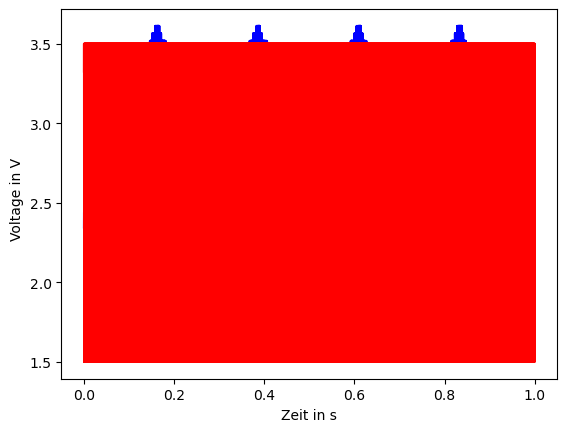

In [83]:
zeit, voltage = np.genfromtxt(os.getcwd() + "/Messdaten/DA-SinusSchwingung.csv", delimiter=";", skip_header=3, usecols=(0,1)).T
t = np.linspace(0, 1, 100000)
y = np.sin(t)
sinwave = 2.5 + np.sin(np.arange(0, 10000, 0.009999)[97:])

plt.plot(zeit, voltage,'b')
plt.plot(zeit, sinwave,'r')
plt.xlabel("Zeit in s")
plt.ylabel("Voltage in V  ")
plt.show()